### 1. Biznes muammosini tushunish

Nima uchun kompaniya uchun mijoz ketishini oldindan bilish muhim?

Javob: Kompaniya har bir ketayotgan mijozni aniqlab, unga bir qancha taklif berib, mijozni saqlab qolishi va shu orqali iqtisodiy o'sishga erishishi mumkin.

Qaysi turdagi mijozlar "xavfli" toifaga kiradi?

Javob: Ketishi mumkin bo'lgan, ya'ni kompaniya xizmatlaridan foydalanishni to'xtatishi mumkin bo'lgan yoki to'xtatayotgan mijozlar.

### 2.  Ma’lumotlarni tahlil qilish va gipotezalarni tekshirish

In [9]:
import pandas as pd

df=pd.read_csv('data.csv')
# dastlabki ma'luotlarni ko'rib chiqamiz
df.head()
#df.info()

#yangi mijozlar ko'proq ketadimi degan gipotezani tekshiramiz
df1=df[(df['Churn']=='Yes') & (df['tenure']<=1.0)]
print(df1.shape[0]," ta yangi mijoz ketgan")

# Ayollar kamroq ketadimi degan gipotezani tekshiramiz
df1=df[(df['Churn'] == 'Yes') & (df['gender'] == 'Female')]
print(df1.shape[0]," ta ayol mijoz ketgan")

# Internet xizmatidan foydalanuvchilar ko‘proq ketadi degan gipotezani tekshiramiz
df1=df[(df['Churn'] == 'Yes') & (df['InternetService'] == 'No')]
print(df1.shape[0]," ta internet xizmatidan foydalanuvchi mijoz ketgan")

378  ta yangi mijoz ketgan
939  ta ayol mijoz ketgan
113  ta internet xizmatidan foydalanuvchi mijoz ketgan


### 3. Vizualizatsiya

C:\Users\user\AppData\Local\Temp\ipykernel_1704\2552401035.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Churn')


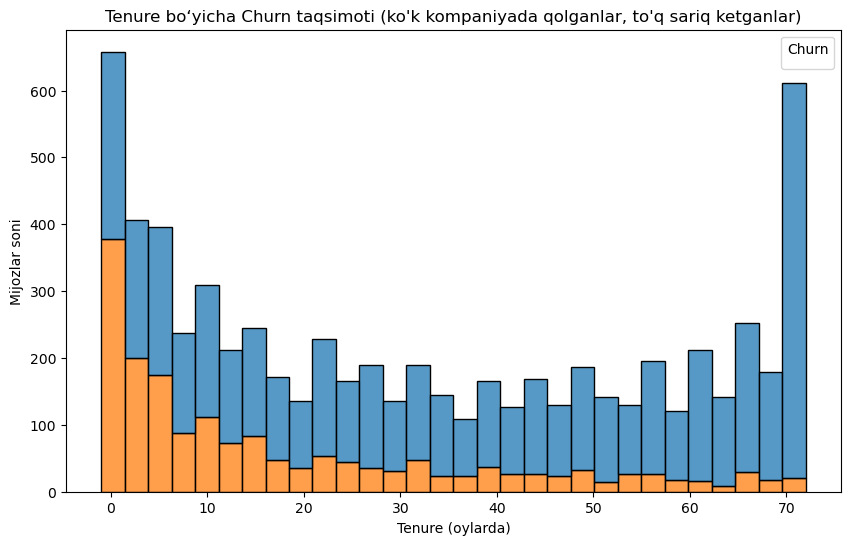

C:\Users\user\AppData\Local\Temp\ipykernel_1704\2552401035.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df1, x='Churn', y='MonthlyCharges', palette=['lightblue', 'lightcoral'])


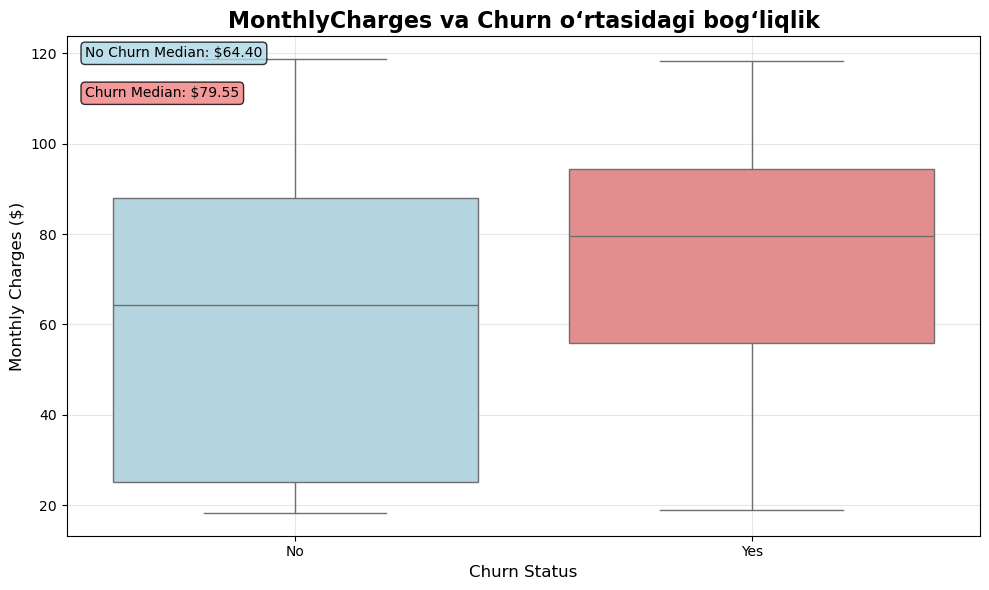

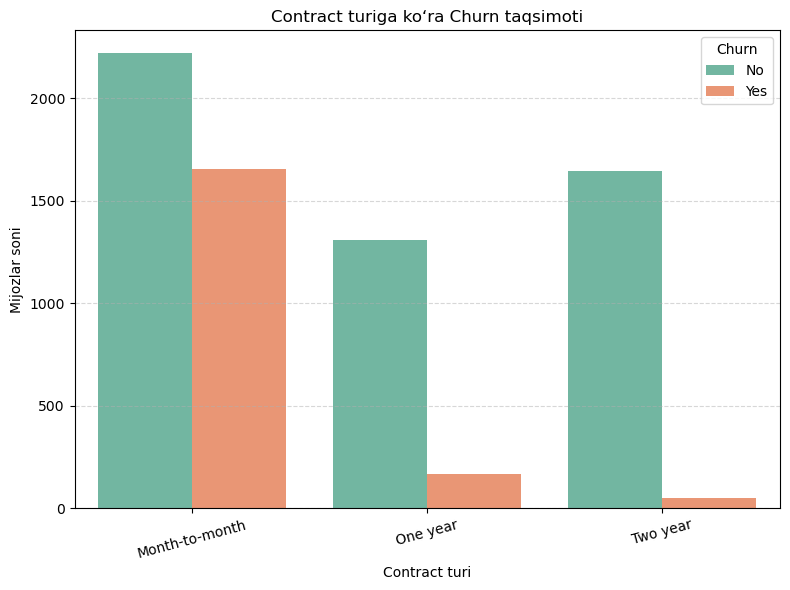

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

#tenure (kompaniyada qolish muddati) bo‘yicha Churn taqsimoti
plt.figure(figsize=(10,6))
sns.histplot(data=df, x='tenure', hue='Churn', multiple='stack', kde=False, bins=30)
plt.title('Tenure bo‘yicha Churn taqsimoti (ko\'k kompaniyada qolganlar, to\'q sariq ketganlar)')
plt.xlabel('Tenure (oylarda)')
plt.ylabel('Mijozlar soni')
plt.legend(title='Churn')
plt.show()

# MonthlyCharges va Churn o‘rtasidagi bog‘liqlik
df1=df.copy()
df1['MonthlyCharges'] = pd.to_numeric(df['MonthlyCharges'], errors='coerce')
plt.figure(figsize=(10, 6))
sns.boxplot(data=df1, x='Churn', y='MonthlyCharges', palette=['lightblue', 'lightcoral'])
plt.title('MonthlyCharges va Churn o‘rtasidagi bog‘liqlik', fontsize=16, fontweight='bold')
plt.xlabel('Churn Status', fontsize=12)
plt.ylabel('Monthly Charges ($)', fontsize=12)
plt.grid(True, alpha=0.3)

# statistika qo'shamiz
no_churn_median = df1[df1['Churn'] == 'No']['MonthlyCharges'].median()
churn_median = df1[df1['Churn'] == 'Yes']['MonthlyCharges'].median()

plt.text(0.02, 0.98, f'No Churn Median: ${no_churn_median:.2f}', 
         transform=plt.gca().transAxes, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.8))
plt.text(0.02, 0.90, f'Churn Median: ${churn_median:.2f}', 
         transform=plt.gca().transAxes, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='lightcoral', alpha=0.8))

plt.tight_layout()
plt.show()

# Contract turiga ko‘ra Churn taqsimoti
plt.figure(figsize=(8,6))
sns.countplot(data=df, x='Contract', hue='Churn', palette='Set2')
plt.title('Contract turiga ko‘ra Churn taqsimoti')
plt.xlabel('Contract turi')
plt.ylabel('Mijozlar soni')
plt.legend(title='Churn')
plt.xticks(rotation=15)
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

### 4. Ma’lumotlarni tozalash

In [11]:
# Yetishmayotgan qiymatlarni o'chiramiz
df_cleaned=df.copy()
df_cleaned=df.dropna()

# Noto‘g‘ri qiymatlar (??, unknown)ni tozalash
df_cleaned = df_cleaned[~df_cleaned.apply(lambda x: x.astype(str).str.contains(r'\?\?|unknown', case=False, na=False)).any(axis=1)]


# Noodatiy yoki salbiy qiymatlarni o'chiramiz (TotalCharges > 10000, tenure < 0)
df_cleaned['TotalCharges'] = pd.to_numeric(df_cleaned['TotalCharges'], errors='coerce')
df_cleaned = df_cleaned[df_cleaned['TotalCharges'] <= 10000]
df_cleaned=df_cleaned[df_cleaned['tenure']>=0]

#To‘g‘ri ma’lumot turlari bilan ishlash
df_cleaned['MonthlyCharges'] = pd.to_numeric(df_cleaned['MonthlyCharges'], errors='coerce')
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5676 entries, 1 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5676 non-null   object 
 1   gender            5676 non-null   object 
 2   SeniorCitizen     5676 non-null   int64  
 3   Partner           5676 non-null   object 
 4   Dependents        5676 non-null   object 
 5   tenure            5676 non-null   float64
 6   PhoneService      5676 non-null   object 
 7   MultipleLines     5676 non-null   object 
 8   InternetService   5676 non-null   object 
 9   OnlineSecurity    5676 non-null   object 
 10  OnlineBackup      5676 non-null   object 
 11  DeviceProtection  5676 non-null   object 
 12  TechSupport       5676 non-null   object 
 13  StreamingTV       5676 non-null   object 
 14  StreamingMovies   5676 non-null   object 
 15  Contract          5676 non-null   object 
 16  PaperlessBilling  5676 non-null   object 
 17  

### 5. Xususiyatlar bilan ishlash

In [12]:
# Kategorik ustunlarni kodlash

from sklearn.preprocessing import LabelEncoder, StandardScaler

df_encoded = df_cleaned.copy()

# Label Encoding
binary_cols = ['gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']
le = LabelEncoder()
for col in binary_cols:
    df_encoded[col] = le.fit_transform(df_encoded[col])

# One-Hot Encoding
one_hot_cols = ['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
                'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
                'Contract', 'PaymentMethod']

df_encoded = pd.get_dummies(df_encoded, columns=one_hot_cols)

# Step 3: Sonli ustunlarni masshtablash (Scaler orqali)
scaler = StandardScaler()
num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
df_encoded[num_cols] = scaler.fit_transform(df_encoded[num_cols])

# model o'qitish uchun kerakli bo'lmagan ustunlarni o'chiramiz
df_encoded = df_encoded.drop(columns=['customerID'])

### 6. Model yaratish

LogisticRegression modeli aniqligi: 0.7962419260129184
F1 Score: 0.5864
ROC-AUC Score: 0.8382


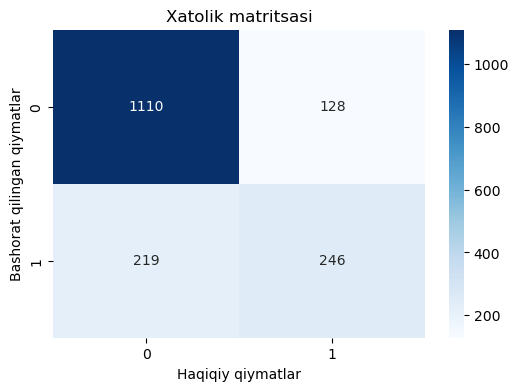

RandomForestClassifier modeli aniqligi: 0.7709923664122137
F1 Score: 0.5149
ROC-AUC Score: 0.8382


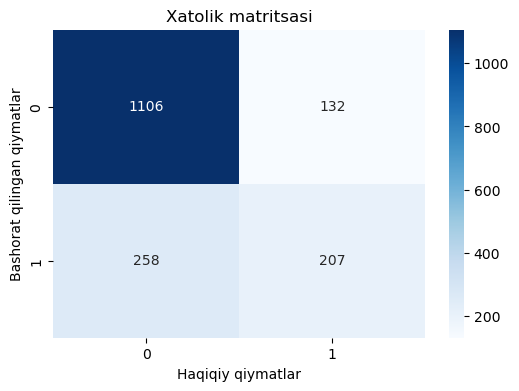

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,f1_score, roc_auc_score, roc_curve, classification_report
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

X = df_encoded.drop(columns=['Churn'])
Y = df_encoded['Churn']

# data set ni test va train qismlarga bo'lamiz
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=42)

log_reg_model=LogisticRegression()

random_forest_model=RandomForestClassifier()

#modellarni o'qitamiz
log_reg_model.fit(x_train,y_train)
random_forest_model.fit(x_train,y_train)


# LogisticRegression modeli sifatini baholaymiz
y_predict=log_reg_model.predict(x_test)
Y_pred_proba = log_reg_model.predict_proba(x_test)[:,1]

accuracy=accuracy_score(y_predict,y_test)
print("LogisticRegression modeli aniqligi:",accuracy)

f1 = f1_score(y_test, y_predict)
print(f"F1 Score: {f1:.4f}")

roc_auc = roc_auc_score(y_test, Y_pred_proba)
print(f"ROC-AUC Score: {roc_auc:.4f}")

cm=confusion_matrix(y_test,y_predict)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(Y), yticklabels=np.unique(Y))
plt.xlabel('Haqiqiy qiymatlar')
plt.ylabel('Bashorat qilingan qiymatlar')
plt.title('Xatolik matritsasi')
plt.show()

# RandomForestClassifier modeli sifatini baholaymiz 
y_predict=random_forest_model.predict(x_test)
Y_pred_proba = log_reg_model.predict_proba(x_test)[:,1]

accuracy=accuracy_score(y_predict,y_test)
print("RandomForestClassifier modeli aniqligi:",accuracy)

f1 = f1_score(y_test, y_predict)
print(f"F1 Score: {f1:.4f}")

roc_auc = roc_auc_score(y_test, Y_pred_proba)
print(f"ROC-AUC Score: {roc_auc:.4f}")

cm=confusion_matrix(y_test,y_predict)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(Y), yticklabels=np.unique(Y))
plt.xlabel('Haqiqiy qiymatlar')
plt.ylabel('Bashorat qilingan qiymatlar')
plt.title('Xatolik matritsasi')
plt.show()

### 7. Natijalarni tahlil qilish

In [14]:
# Eng muhim xususiyatlarni aniqlash

# Logistik regressiya uchun
coef = log_reg_model.coef_[0]
features = X.columns

# Xususiyat va ularning modeldagi ahamiyati
feat_imp = pd.Series(coef, index=features).sort_values(key=abs, ascending=False)

print("Eng muhim xususiyatlar Logistik regressiya modeli uchun:")
print(feat_imp)

# Random Forest uchun

importances = random_forest_model.feature_importances_
feat_imp = pd.Series(importances, index=X.columns).sort_values(ascending=False)

print("Eng muhim xususiyatlar Random Forest modeli uchun:")
print(feat_imp.head)

Eng muhim xususiyatlar Logistik regressiya modeli uchun:
tenure                                    -1.383536
Contract_Two year                         -0.805208
Contract_Month-to-month                    0.612440
TotalCharges                               0.610835
InternetService_DSL                       -0.534612
InternetService_Fiber optic                0.404142
OnlineSecurity_Yes                        -0.296653
PaperlessBilling                           0.250469
TechSupport_Yes                           -0.247586
PhoneService                              -0.217059
TechSupport_No internet service           -0.216336
StreamingMovies_No internet service       -0.216336
OnlineSecurity_No internet service        -0.216336
OnlineBackup_No internet service          -0.216336
StreamingTV_No internet service           -0.216336
DeviceProtection_No internet service      -0.216336
InternetService_No                        -0.216336
MultipleLines_No                          -0.215949
Streami

In [15]:
# Qaysi gipotezalar tasdiqlanganini aniqlaymiz

tenure_coef = log_reg_model.coef_[0][X.columns.get_loc('tenure')]
print(f"'tenure' ustuni koeffitsienti: {tenure_coef:.4f}")

for col in X.columns:
    if 'InternetService_' in col:
        coef = log_reg_model.coef_[0][X.columns.get_loc(col)]
        print(f"{col}: {coef:.4f}")

gender_coef = log_reg_model.coef_[0][X.columns.get_loc('gender')]
print(f"'gender' ustuni koeffitsienti: {gender_coef:.4f}")

'tenure' ustuni koeffitsienti: -1.3835
InternetService_DSL: -0.5346
InternetService_Fiber optic: 0.4041
InternetService_No: -0.2163
'gender' ustuni koeffitsienti: 0.0345


In [ ]:
# modelni saqlash

import joblib
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.base import BaseEstimator, ClassifierMixin

# Ehtimollik chiqarish uchun o‘ram (wrapper)
class ProbaPredictor(BaseEstimator, ClassifierMixin):
    """Pipeline ni .predict() chaqirilganda ehtimollik (P{Churn=1}) qaytarish uchun o‘raydi."""
    def __init__(self, model):
        self.model = model
    def fit(self, X, y=None):
        return self
    def predict(self, X):
        return self.model.predict_proba(X)[:, 1]  # 0–1 orasida ehtimollik
    def predict_proba(self, X):
        return self.model.predict_proba(X)

# X va y — to‘liq, filtrlanmagan trening ma’lumot
X = df_cleaned.drop(columns=['customerID', 'Churn'])
y = df_cleaned['Churn'].map({'No': 0, 'Yes': 1})

# Ustun turlari
NUM_COLS = ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']
CAT_COLS = [c for c in X.columns if c not in NUM_COLS]

# Preprocessing
preprocess = ColumnTransformer([
    ('num', StandardScaler(), NUM_COLS),
    ('cat', OneHotEncoder(handle_unknown='ignore'), CAT_COLS)
])

# Pipeline (LogisticRegression ichida qayta o‘qitiladi)
pipe = Pipeline([
    ('prep', preprocess),
    ('clf',  LogisticRegression(max_iter=1000, class_weight='balanced'))
])

pipe.fit(X, y)

# Saqlash: ehtimollik beradigan modelni dump qilamiz
final_model = ProbaPredictor(pipe)
joblib.dump(final_model, 'churn_pipeline.pkl')

print("✅  New churn_pipeline.pkl saved (preprocess + LR + ProbaPredictor)")


✅  New churn_pipeline.pkl saved (preprocess + LR + ProbaPredictor)
